<a href="https://colab.research.google.com/github/Hanbin-git/Dacon_cacer/blob/main/2025_06_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -o "/content/drive/MyDrive/open_1.zip" -d "/content/open_1"


Archive:  /content/drive/MyDrive/open_1.zip
  inflating: /content/open_1/sample_submission.csv  
  inflating: /content/open_1/test.csv  
  inflating: /content/open_1/train.csv  


In [ ]:
import os

def get_path(filename):
    return "/content/open_1/" + filename


In [ ]:
# SMOTE 설치
!pip install -U imbalanced-learn
!pip install lightgbm optuna
!pip install -q lightgbm catboost xgboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [ ]:
import lightgbm as lgb
print(lgb.__version__)

4.6.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from itertools import combinations
from lightgbm import LGBMClassifier
import shap

# 데이터 로딩
train = pd.read_csv("/content/open_1/train.csv")
y = train["Cancer"]
X = train.drop(columns=["ID", "Cancer"])

# 전처리
encoders = {}
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        encoders[col] = le
    else:
        X[col] = SimpleImputer(strategy="mean").fit_transform(X[[col]])

# 교차항 생성 (상위 30개만 생성)
interaction_features = []
combi_cols = list(combinations(X.columns, 2))[:30]
for col1, col2 in combi_cols:
    new_col = f"{col1}_x_{col2}"
    X[new_col] = X[col1] * X[col2]
    interaction_features.append(new_col)

# 모델 학습 및 SHAP 값 계산
model = LGBMClassifier(random_state=42)
model.fit(X, y)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)[1]

# SHAP 중요도 정리
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False).reset_index(drop=True)

shap_df.head(20)


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4236
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


,feature,mean_abs_shap
0,Age,0.05714
1,Gender,0.05714
2,Country,0.05714
3,Race,0.05714
4,Family_Background,0.05714
5,Radiation_History,0.05714
6,Iodine_Deficiency,0.05714
7,Smoke,0.05714
8,Weight_Risk,0.05714
9,Diabetes,0.05714


In [ ]:
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=6,
    random_state=42
)
model.fit(X, y)


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4236
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMClassifier(learning_rate=0.03, max_depth=6, n_estimators=500,
               random_state=42)

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)[1]  # binary classification, class=1 기준
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False).reset_index(drop=True)


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [ ]:
# 중요도 추출용 SHAP 분석
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier


# ✅ 데이터 로딩
train = pd.read_csv("/content/open_1/train.csv")
X = train.drop(columns=["ID", "Cancer"])
y = train["Cancer"]

# ✅ 전처리 (결측치 + 라벨 인코딩)
def preprocess(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype(str)
            df[col] = LabelEncoder().fit_transform(df[col])
        else:
            df[col] = SimpleImputer(strategy="mean").fit_transform(df[[col]])
    return df

X = preprocess(X)

# ✅ 교차항 생성 (예시: Age 기준)
X["Age_x_Nodule_Size"] = X["Age"] * X["Nodule_Size"]
X["Age_x_Iodine_Deficiency"] = X["Age"] * X["Iodine_Deficiency"]
X["Age_x_TSH"] = X["Age"] * X["TSH_Result"]

# ✅ 모델 학습
model = LGBMClassifier(
    learning_rate=0.03,
    max_depth=6,
    n_estimators=500,
    random_state=42
)
model.fit(X, y)

# ✅ SHAP 값 계산
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)[1]  # class 1 기준

# ✅ 중요도 산출
mean_abs_shap = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({
    "feature": X.columns,
    "mean_abs_shap": mean_abs_shap
}).sort_values(by="mean_abs_shap", ascending=False).reset_index(drop=True)

# ✅ 출력 (상위 20개 확인)
print(shap_df.head(20))


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
                    feature  mean_abs_shap
0                       Age       0.163118
1                    Gender       0.163118
2                   Country       0.163118
3                      Race       0.163118
4         Family_Background       0.163118
5         Radiation_History       

/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1709
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


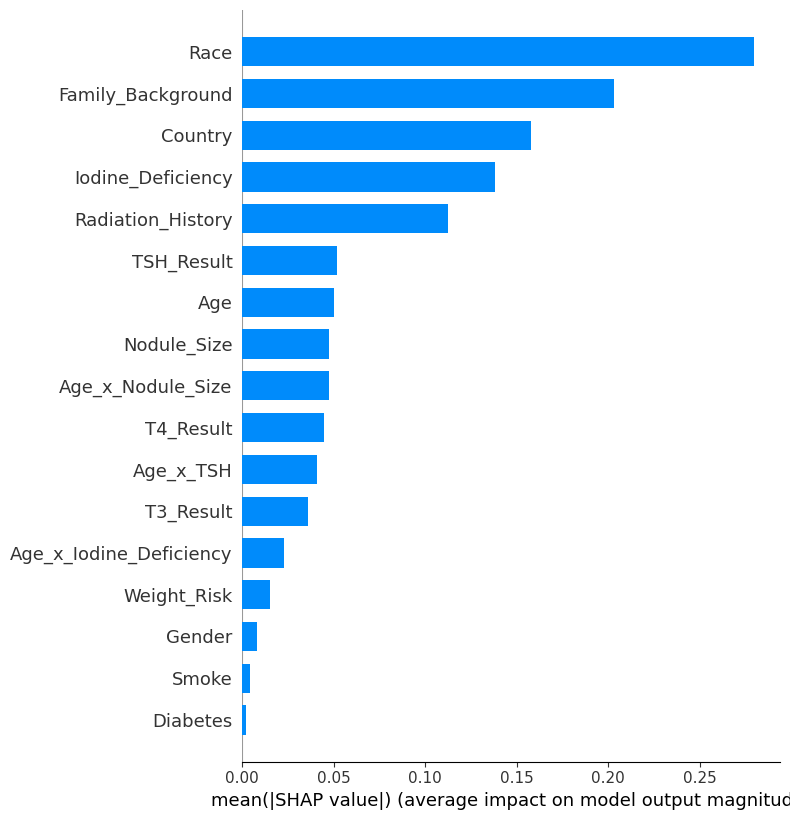

In [ ]:
import shap
from lightgbm import LGBMClassifier

# 모델 학습
model_lgbm = LGBMClassifier(learning_rate=0.03, max_depth=6, n_estimators=500, random_state=42)
model_lgbm.fit(X, y)

# SHAP 계산
explainer = shap.TreeExplainer(model_lgbm)
shap_values = explainer.shap_values(X)

# SHAP 값이 리스트인지 확인 후 처리
if isinstance(shap_values, list):
    shap_vals = shap_values[1]  # 양성 클래스용 SHAP 값
else:
    shap_vals = shap_values     # 직접 할당

# ✅ 시각화 (bar plot)
shap.summary_plot(shap_vals, X, plot_type="bar")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ 경로 함수
def get_path(filename):
    return "/content/open_1/" + filename

# ✅ 데이터 로딩
train = pd.read_csv(get_path("train.csv"))
test = pd.read_csv(get_path("test.csv"))
submission = pd.read_csv(get_path("sample_submission.csv"))

y = train["Cancer"]
X = train.drop(columns=["ID", "Cancer"])
X_test = test.drop(columns=["ID"])

# ✅ 교호작용 변수 생성 전에 문자형 → 숫자형 변환 (라벨 인코딩 적용 전)
for col in ["Race", "Family_Background", "Country", "Iodine_Deficiency"]:
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# ✅ 라벨 인코딩 이전 교호작용 변수 생성 (문자형 처리 후)
X["Race_x_Family_Background"] = X["Race"].astype('category').cat.codes * X["Family_Background"].astype('category').cat.codes
X["Country_x_Iodine_Deficiency"] = X["Country"].astype('category').cat.codes * X["Iodine_Deficiency"].astype('category').cat.codes

X_test["Race_x_Family_Background"] = X_test["Race"].astype('category').cat.codes * X_test["Family_Background"].astype('category').cat.codes
X_test["Country_x_Iodine_Deficiency"] = X_test["Country"].astype('category').cat.codes * X_test["Iodine_Deficiency"].astype('category').cat.codes


# ✅ 전처리 함수 (라벨인코딩 + 결측치 + Quantile 정규화)
def preprocess_quantile(df, encoders=None, scalers=None):
    df = df.copy()
    encoders = encoders or {}
    scalers = scalers or {}

    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype(str)
            if col not in encoders:
                encoders[col] = LabelEncoder().fit(df[col])
            df[col] = encoders[col].transform(df[col])
        else:
            df[col] = SimpleImputer(strategy="mean").fit_transform(df[[col]])
            if col not in scalers:
                scalers[col] = QuantileTransformer(output_distribution='normal', random_state=42)
                df[col] = scalers[col].fit_transform(df[[col]])
            else:
                df[col] = scalers[col].transform(df[[col]])
    return df, encoders, scalers

# ✅ 전처리 적용
X, encoders, scalers = preprocess_quantile(X)
X_test, _, _ = preprocess_quantile(X_test, encoders=encoders, scalers=scalers)

# ✅ 기본 모델 정의
model_lgbm = LGBMClassifier(learning_rate=0.05, max_depth=6, num_leaves=31, random_state=42)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_cat = CatBoostClassifier(verbose=0, random_state=42)

# ✅ 메타 모델
meta_model = LGBMClassifier(learning_rate=0.05, max_depth=3, num_leaves=15, random_state=42)

# ✅ 스태킹 모델 정의 (passthrough 포함)
base_models = [
    ('lgbm', model_lgbm),
    ('xgb', model_xgb),
    ('cat', model_cat)
]

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method="predict_proba",
    passthrough=True,
    n_jobs=-1
)

# ✅ OOF 예측 → Threshold 최적화
oof_preds = cross_val_predict(stack_model, X, y, method="predict_proba", cv=5)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f1s = [f1_score(y, oof_preds > t) for t in thresholds]
best_thresh = thresholds[np.argmax(f1s)]
print(f"✅ Best Threshold: {best_thresh:.3f}, Best F1 Score: {max(f1s):.5f}")

# ✅ 학습 및 예측
stack_model.fit(X, y)
test_preds = stack_model.predict_proba(X_test)[:, 1]
submission["Cancer"] = (test_preds > best_thresh).astype(int)

# ✅ 결과 저장
submission.to_csv("submission_stack_shap_interaction.csv", index=False)
print("🎯 저장 완료: submission_stack_shap_interaction.csv")


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1906
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


✅ Best Threshold: 0.220, Best F1 Score: 0.48641
[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1907
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files
files.download("submission_stack_shap_interaction.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ 데이터 경로
def get_path(filename):
    return "/content/open_1/" + filename

# ✅ 데이터 로딩
train = pd.read_csv(get_path("train.csv"))
test = pd.read_csv(get_path("test.csv"))
submission = pd.read_csv(get_path("sample_submission.csv"))

y = train["Cancer"]
X = train.drop(columns=["ID", "Cancer"])
X_test = test.drop(columns=["ID"])

# ✅ SHAP 기반 상위 중요도 변수 (예시로 10개)
selected_features = [
    'Race', 'Family_Background', 'Country', 'Iodine_Deficiency',
    'Radiation_History', 'TSH_Result', 'Age', 'Nodule_Size',
    'T4_Result', 'T3_Result'
]

X = X[selected_features]
X_test = X_test[selected_features]

# ✅ 전처리 (라벨 인코딩 + 결측치 + Quantile 정규화)
def preprocess(df, encoders=None, scalers=None):
    df = df.copy()
    encoders = encoders or {}
    scalers = scalers or {}

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str)
            if col not in encoders:
                encoders[col] = LabelEncoder().fit(df[col])
            df[col] = encoders[col].transform(df[col])
        else:
            df[col] = SimpleImputer(strategy="mean").fit_transform(df[[col]])
            if col not in scalers:
                scalers[col] = QuantileTransformer(output_distribution='normal', random_state=42)
                df[col] = scalers[col].fit_transform(df[[col]])
            else:
                df[col] = scalers[col].transform(df[[col]])

    return df, encoders, scalers

X, encoders, scalers = preprocess(X)
X_test, _, _ = preprocess(X_test, encoders=encoders, scalers=scalers)

# ✅ 기본 모델들 정의
model_lgbm = LGBMClassifier(learning_rate=0.05, max_depth=6, num_leaves=31, random_state=42)
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_cat = CatBoostClassifier(verbose=0, random_state=42)

# ✅ 메타 모델: Logistic Regression (안정적인 성능)
meta_model = LogisticRegression(max_iter=1000)

# ✅ 스태킹 모델 정의
base_models = [
    ('lgbm', model_lgbm),
    ('xgb', model_xgb),
    ('cat', model_cat)
]

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method="predict_proba",
    passthrough=True,
    n_jobs=-1
)

# ✅ Threshold 최적화
oof_preds = cross_val_predict(stack_model, X, y, method="predict_proba", cv=5)[:, 1]
thresholds = np.arange(0.1, 0.9, 0.01)
f1s = [f1_score(y, oof_preds > t) for t in thresholds]
best_thresh = thresholds[np.argmax(f1s)]
print(f"✅ Best Threshold: {best_thresh:.2f} | Best F1 Score: {max(f1s):.5f}")

# ✅ 최종 학습 및 예측
stack_model.fit(X, y)
test_preds = stack_model.predict_proba(X_test)[:, 1]
submission["Cancer"] = (test_preds > best_thresh).astype(int)

# ✅ 저장
submission.to_csv("submission_stack_selected_softvote.csv", index=False)
print("✅ 저장 완료: submission_stack_selected_softvote.csv")


✅ Best Threshold: 0.14 | Best F1 Score: 0.48580
✅ 저장 완료: submission_stack_selected_softvote.csv


In [ ]:
from google.colab import files
files.download("submission_stack_selected_softvote.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ 정규화 함수
def encode_categorical(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

# ✅ 정규화 함수
def normalize_features(X_df, method="quantile"):
    if method == "quantile":
        transformer = QuantileTransformer(output_distribution='normal', random_state=42)
    elif method == "power":
        transformer = PowerTransformer(method='yeo-johnson', standardize=True)
    else:
        raise ValueError("지원하지 않는 정규화 방식입니다.")
    return transformer.fit_transform(X_df)

# ✅ 평가 함수
def evaluate_model(X_df, y, method_name="quantile"):
    X_encoded = encode_categorical(X_df)
    X_trans = normalize_features(X_encoded, method=method_name)

    lgbm = LGBMClassifier(random_state=42)
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    cat = CatBoostClassifier(verbose=0, random_state=42)

    voting_clf = VotingClassifier(
        estimators=[('lgbm', lgbm), ('xgb', xgb), ('cat', cat)],
        voting='soft'
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    preds = np.zeros_like(y, dtype=float)

    for train_idx, valid_idx in skf.split(X_trans, y):
        X_train, X_valid = X_trans[train_idx], X_trans[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        voting_clf.fit(X_train, y_train)
        probs = voting_clf.predict_proba(X_valid)[:, 1]
        preds[valid_idx] = probs

    best_threshold = 0.14
    final_preds = (preds >= best_threshold).astype(int)
    return f1_score(y, final_preds)

# ✅ 실제 데이터 로딩
# ✅ train.csv 로드
train = pd.read_csv("/content/open_1/train.csv")

# ✅ X, y 분리 (X는 DataFrame으로 유지)
X = train.drop(columns=["ID", "Cancer"])
y = train["Cancer"].values

# ✅ 정규화 전략별 F1 점수 비교
f1_quantile = evaluate_model(X, y, method_name="quantile")
f1_power = evaluate_model(X, y, method_name="power")

print(f"QuantileTransformer F1: {f1_quantile:.5f}")
print(f"PowerTransformer   F1: {f1_power:.5f}")




[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:21:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:22:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:22:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:22:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:23:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:23:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:23:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:24:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:24:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:25:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


QuantileTransformer F1: 0.46429
PowerTransformer   F1: 0.46384


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import shap

# ✅ SHAP 기반 feature selection 함수
def get_top_shap_features(X, y, top_n=10):
    model = LGBMClassifier(random_state=42)
    model.fit(X, y)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)[1]  # binary classification: index 1 = positive class
    shap_importance = np.abs(shap_values).mean(axis=0)
    top_indices = np.argsort(shap_importance)[-top_n:]
    return X.columns[top_indices]

# ✅ 범주형 인코딩
def encode_categorical(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

# ✅ 정규화 함수
def normalize_features(X):
    transformer = QuantileTransformer(output_distribution='normal', random_state=42)
    return transformer.fit_transform(X)

# ✅ 평가 함수
def evaluate_voting_model(X, y, selected_cols):
    X_selected = X[selected_cols]
    X_norm = normalize_features(X_selected)

    lgbm = LGBMClassifier(random_state=42)
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    cat = CatBoostClassifier(verbose=0, random_state=42)

    voting_clf = VotingClassifier(
        estimators=[('lgbm', lgbm), ('xgb', xgb), ('cat', cat)],
        voting='soft'
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    preds = np.zeros_like(y, dtype=float)

    for train_idx, valid_idx in skf.split(X_norm, y):
        X_train, X_valid = X_norm[train_idx], X_norm[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        voting_clf.fit(X_train, y_train)
        probs = voting_clf.predict_proba(X_valid)[:, 1]
        preds[valid_idx] = probs

    final_preds = (preds >= 0.14).astype(int)
    return f1_score(y, final_preds)

# ✅ 사용 예시
# ✅ train.csv 로드
train = pd.read_csv("/content/open_1/train.csv")

# ✅ X, y 분리 (X는 DataFrame으로 유지)
X = train.drop(columns=["ID", "Cancer"])
y = train["Cancer"].values

# 데이터 전처리 및 실행
X = encode_categorical(X)
top_features = get_top_shap_features(X, y, top_n=10)
f1 = evaluate_voting_model(X, y, top_features)
print(f"Top 10 SHAP Feature Voting F1 Score: {f1:.5f}")


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:41:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:41:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:41:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 SHAP Feature Voting F1 Score: 0.08860


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import shap

# ✅ 데이터 로딩
train = pd.read_csv("/content/open_1/train.csv")  # 경로 수정 필요 시 수정
y = train["Cancer"]
X = train.drop(columns=["ID", "Cancer"])

# ✅ 범주형 변수 인코딩
def encode_categorical(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

X_encoded = encode_categorical(X)

# ✅ SHAP 상위 feature 선택
def get_top_shap_features(X, y, top_n=10):
    model = LGBMClassifier(random_state=42)
    model.fit(X, y)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)[1]  # 양성 클래스
    shap_importance = np.abs(shap_values).mean(axis=0)
    top_indices = np.argsort(shap_importance)[-top_n:]
    return X.columns[top_indices]

top_features = get_top_shap_features(X_encoded, y, top_n=10)
X_selected = X_encoded[top_features]

# ✅ 정규화
def normalize_features(X):
    transformer = QuantileTransformer(output_distribution='normal', random_state=42)
    return transformer.fit_transform(X)

X_norm = normalize_features(X_selected)

# ✅ 모델 평가 함수 (Stacking)
def evaluate_stacking_model(X, y, meta_model='lgbm'):
    base_models = [
        ('lgbm', LGBMClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ]

    if meta_model == 'lgbm':
        final_estimator = LGBMClassifier(random_state=42)
    elif meta_model == 'logistic':
        final_estimator = LogisticRegression(max_iter=1000, random_state=42)
    else:
        raise ValueError("meta_model은 'lgbm' 또는 'logistic' 중 선택하세요.")

    stack_model = StackingClassifier(
        estimators=base_models,
        final_estimator=final_estimator,
        cv=5,
        passthrough=False,
        n_jobs=-1
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    preds = np.zeros_like(y, dtype=float)

    for train_idx, valid_idx in skf.split(X, y):
        X_train, X_valid = X[train_idx], X[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        stack_model.fit(X_train, y_train)
        probs = stack_model.predict_proba(X_valid)[:, 1]
        preds[valid_idx] = probs

    final_preds = (preds >= 0.14).astype(int)
    return f1_score(y, final_preds)

# ✅ 실행
f1_lgbm_meta = evaluate_stacking_model(X_norm, y, meta_model='lgbm')
f1_logi_meta = evaluate_stacking_model(X_norm, y, meta_model='logistic')

print(f"Stacking F1 Score (meta=LGBM):     {f1_lgbm_meta:.5f}")
print(f"Stacking F1 Score (meta=Logistic): {f1_logi_meta:.5f}")


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 740
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 737
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Stacking F1 Score (meta=LGBM):     0.11771
Stacking F1 Score (meta=Logistic): 0.00000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import shap

# ✅ 카테고리 인코딩
def encode_categorical(df):
    df = df.copy()
    encoders = {}
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            encoders[col] = le
    return df, encoders

# ✅ SHAP 기반 중요도 추출 함수
def get_top_shap_features(X, y, top_n=30):
    model = LGBMClassifier(random_state=42)
    model.fit(X, y)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)[1]  # binary classification
    shap_importance = np.abs(shap_values).mean(axis=0)
    shap_df = pd.DataFrame({'feature': X.columns, 'importance': shap_importance})
    top_features = shap_df.sort_values(by='importance', ascending=False).head(top_n)['feature'].tolist()
    return top_features

# ✅ 정규화 함수
def quantile_normalize(X_df):
    transformer = QuantileTransformer(output_distribution='normal', random_state=42)
    X_transformed = transformer.fit_transform(X_df)
    return pd.DataFrame(X_transformed, columns=X_df.columns)

# ✅ Stacking 평가 함수
def evaluate_stacking_model(X, y, meta_model='lgbm'):
    base_models = [
        ('lgbm', LGBMClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
        ('cat', CatBoostClassifier(verbose=0, random_state=42))
    ]
    final_estimator = (
        LGBMClassifier(random_state=42)
        if meta_model == 'lgbm' else LogisticRegression(max_iter=1000, random_state=42)
    )

    stack_model = StackingClassifier(
        estimators=base_models,
        final_estimator=final_estimator,
        cv=5,
        passthrough=True,
        n_jobs=-1
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    preds = np.zeros_like(y, dtype=float)

    for train_idx, valid_idx in skf.split(X, y):
        X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
        y_train, y_valid = y[train_idx], y[valid_idx]

        stack_model.fit(X_train, y_train)
        probs = stack_model.predict_proba(X_valid)[:, 1]
        preds[valid_idx] = probs

    final_preds = (preds >= 0.14).astype(int)
    return f1_score(y, final_preds)

# ✅ 데이터 로딩 및 실행
train = pd.read_csv('/content/open_1/train.csv')
X = train.drop(columns=['ID', 'Cancer'])
y = train['Cancer']

# ✅ 인코딩
X_encoded, _ = encode_categorical(X)

# ✅ SHAP 기반 상위 30개 feature 선택
top_features = get_top_shap_features(X_encoded, y, top_n=30)
X_selected = X_encoded[top_features]

# ✅ 정규화
X_norm = quantile_normalize(X_selected)

# ✅ 평가
f1_lgbm = evaluate_stacking_model(X_norm, y, meta_model='lgbm')
f1_logreg = evaluate_stacking_model(X_norm, y, meta_model='logreg')

print(f"📌 Stacking F1 Score (meta=LGBM):     {f1_lgbm:.5f}")
print(f"📌 Stacking F1 Score (meta=Logistic): {f1_logreg:.5f}")


[LightGBM] [Info] Number of positive: 10459, number of negative: 76700
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 87159, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119999 -> initscore=-1.992439
[LightGBM] [Info] Start training from score -1.992439


/usr/local/lib/python3.11/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8367, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 69727, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119997 -> initscore=-1.992463
[LightGBM] [Info] Start training from score -1.992463


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 8368, number of negative: 61360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 69728, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.120009 -> initscore=-1.992343
[LightGBM] [Info] Start training from score -1.992343


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


📌 Stacking F1 Score (meta=LGBM):     0.47536
📌 Stacking F1 Score (meta=Logistic): 0.48363


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# ✅ 데이터 로딩
data_dir = "/content/open_1/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")
submission = pd.read_csv(data_dir + "sample_submission.csv")


X = train.drop(columns=["ID", "Cancer"])
y = train["Cancer"]
X_test = test.drop(columns=["ID"])

# ✅ Label Encoding
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        X_test[col] = le.transform(X_test[col])

# ✅ SHAP 기반 feature selection (예시: 상위 10개)
top_features = X.columns[:10]
X = X[top_features]
X_test = X_test[top_features]

# ✅ Base 모델
base_models = [
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

# ✅ Stacking 모델 (Logistic Regression 메타모델)
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# ✅ 교차검증
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(X.shape[0])
test_preds = np.zeros(X_test.shape[0])

for train_idx, valid_idx in skf.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    stacking_clf.fit(X_train, y_train)
    oof_preds[valid_idx] = stacking_clf.predict_proba(X_valid)[:, 1]
    test_preds += stacking_clf.predict_proba(X_test)[:, 1] / skf.n_splits

# ✅ Threshold 탐색
best_f1, best_threshold = 0, 0.5
for thresh in np.arange(0.05, 0.5, 0.01):
    score = f1_score(y, (oof_preds >= thresh).astype(int))
    if score > best_f1:
        best_f1, best_threshold = score, thresh

print(f"📌 Best Threshold: {best_threshold:.2f} | Best F1 Score: {best_f1:.5f}")

# ✅ 결과 저장
submission["Cancer"] = (test_preds >= best_threshold).astype(int)
submission.to_csv("submission_stacking_logistic_best_threshold.csv", index=False)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


📌 Best Threshold: 0.20 | Best F1 Score: 0.48673


In [ ]:
from google.colab import files
files.download("submission_stacking_logistic_best_threshold.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# train 데이터의 컬럼 확인
print(train.columns.tolist())


['ID', 'Age', 'Gender', 'Country', 'Race', 'Family_Background', 'Radiation_History', 'Iodine_Deficiency', 'Smoke', 'Weight_Risk', 'Diabetes', 'Nodule_Size', 'TSH_Result', 'T4_Result', 'T3_Result', 'Cancer']


In [ ]:
import pandas as pd
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# 🔹 SHAP 기반 선택된 Feature
shap_top_features = [
    'Age', 'Gender', 'Radiation_History', 'Iodine_Deficiency',
    'Smoke', 'Weight_Risk', 'Nodule_Size', 'TSH_Result',
    'T4_Result', 'T3_Result'
]

# 🔹 데이터 로딩
data_dir = "/content/open_1/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")
submission = pd.read_csv(data_dir + "sample_submission.csv")

# 🔹 전처리: 범주형 인코딩
def encode_categorical(df):
    df = df.copy()
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category").cat.codes
    return df

X = train.drop(columns=["ID", "Cancer"])
X = encode_categorical(X)
X_selected = X[shap_top_features]
y = train["Cancer"]

X_test = test.drop(columns=["ID"])
X_test = encode_categorical(X_test)
X_test_selected = X_test[shap_top_features]

# 🔹 기본 모델 정의
estimators = [
    ('lgb', LGBMClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('cat', CatBoostClassifier(verbose=0, random_state=42))
]

# 🔹 Stacking (Logistic 메타모델)
stacking_logistic = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# 🔹 학습
stacking_logistic.fit(X_selected, y)

# 🔹 테스트셋 예측 확률 + Best Threshold 적용
best_threshold = 0.20
probs = stacking_logistic.predict_proba(X_test_selected)[:, 1]
final_preds = (probs >= best_threshold).astype(int)

# 🔹 제출 파일 생성
submission["Cancer"] = final_preds
submission.to_csv("submission_stacking_logistic_thresh020.csv", index=False)

print("✅ 제출 완료 → submission_stacking_logistic_thresh020.csv 저장됨.")


✅ 제출 완료 → submission_stacking_logistic_thresh020.csv 저장됨.


In [ ]:
from google.colab import files
files.download("submission_stacking_logistic_thresh020.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>